# Linear Regression

###  Regression is a method of predicting a response/dependent/target value based on predictors/independent/features.  Regression techniques primarily differ based the type of relationship between the independent and dependent variables.

#### Examples:
Linear Regression: the response (y) is continuous

Logistic Regression: the response (y) is categorical

For all models, the predictors (x) can be binary (2 categories), ordinal, continuous, count, or categorical.


![Image of Regression](https://cdn-images-1.medium.com/max/1600/0*szXvH1a4ZQytyqhg.png)

### Linear Regression Equation:

$y=\beta_0+\beta_1x_1+\beta_2x_2...+\beta_px_p+\epsilon$

where $\epsilon \sim N(0, \sigma^2)$

What do we want to do? Find the best values for our $\beta_0...\beta_p$.

How do we do that? minimize the error between the predicted value and the actual value

## Problem: Predict the level of prostate-specific antigen using clinical measures in men who were about to receive a radical prostectomy.

#### Data:

A data frame with 97 observations on the following 10 variables.

lcavol: log cancer volume  
lweight: log prostate weight  
age: in years  
lbph: log of the amount of benign prostatic hyperplasia  
svi: seminal vesicle invasion  
lcp: log of capsular penetration  
gleason: a numeric vector  
pgg45: percent of Gleason score 4 or 5  
lpsa: response (y)  
train: logical vector  

In [1]:
#Let's load our data
prostate=read.csv("prostate.csv", sep=",", header=T)

[1] "lcavol"  "lweight" "age"     "lbph"    "svi"     "lcp"     "gleason"
 [8] "pgg45"   "lpsa"    "train"

### To fit a model and test it, you need to split the data into training, validation (to tune hyperparameters), and test sets.

#### Training Dataset: The sample of data used to fit the model.

#### Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.

#### Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

#### What is cross-validation? 
The goal of cross-validation is to test the model’s ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset. You use your training set to generate multiple splits and perform the analysis on one subset (called the training set) and validate the analysis on the other subset (validation set).  The most popular is k-fold cross validation.

![Image of Split](https://cdn-images-1.medium.com/max/1600/1*Nv2NNALuokZEcV6hYEHdGA.png)

In [2]:
## Since we do not have any hyperparamters to tune, let's split the data into trainig and test sets!

train <- subset(prostate,train==TRUE)[,1:9]
test <- subset(prostate,train==FALSE)[,1:9]

In [3]:
nrow(train)
nrow(test)

[1] 67

[1] 30

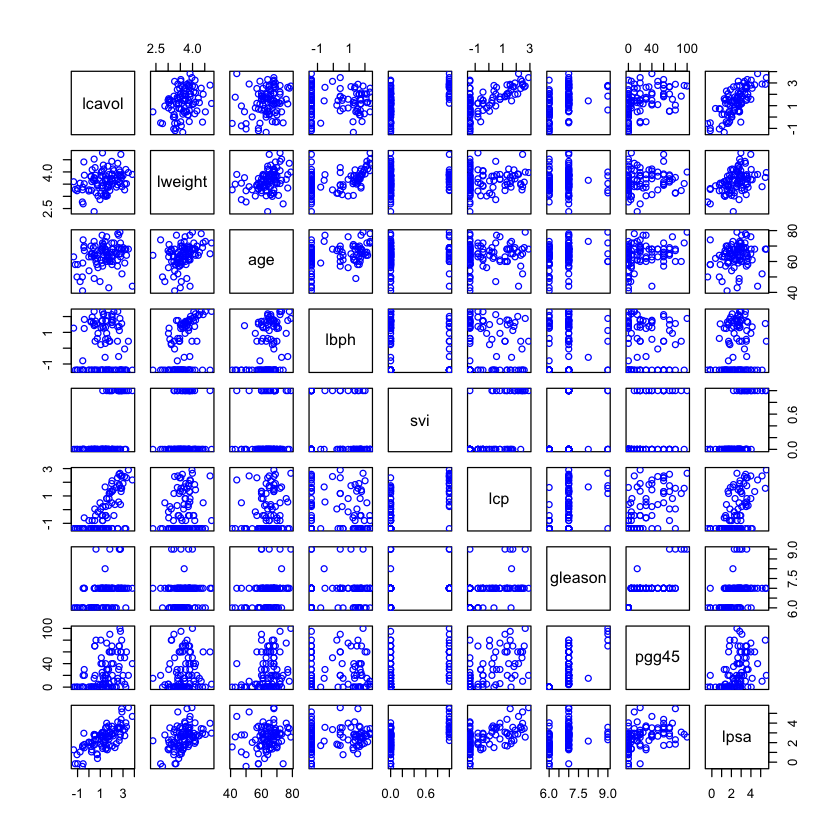

In [4]:
## visualize the data

pairs( prostate[,1:9], col="blue" )

In [5]:
## Let's fit our model using the training data

fit1 <- lm(lpsa ~ ., data = train)
summary(fit1)
# lcavol and lweight are highly significant


# Compute 95% confidence interval
confint(fit1,level=0.95)



Call:
lm(formula = lpsa ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64870 -0.34147 -0.05424  0.44941  1.48675 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.429170   1.553588   0.276  0.78334    
lcavol       0.576543   0.107438   5.366 1.47e-06 ***
lweight      0.614020   0.223216   2.751  0.00792 ** 
age         -0.019001   0.013612  -1.396  0.16806    
lbph         0.144848   0.070457   2.056  0.04431 *  
svi          0.737209   0.298555   2.469  0.01651 *  
lcp         -0.206324   0.110516  -1.867  0.06697 .  
gleason     -0.029503   0.201136  -0.147  0.88389    
pgg45        0.009465   0.005447   1.738  0.08755 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7123 on 58 degrees of freedom
Multiple R-squared:  0.6944,	Adjusted R-squared:  0.6522 
F-statistic: 16.47 on 8 and 58 DF,  p-value: 2.042e-12


,2.5 %,97.5 %
(Intercept),-2.680674329,3.539014595
lcavol,0.361482785,0.791603586
lweight,0.167204780,1.060835229
age,-0.046248270,0.008246226
lbph,0.003813690,0.285882474
svi,0.139585747,1.334831542
lcp,-0.427546584,0.014898130
gleason,-0.432120510,0.373114741
pgg45,-0.001437213,0.020367537


In [6]:
### How well does our model do when we generalize it to an independent test set?

# Prediction
prediction1 <- predict(fit1, newdata = test[,1:8])
predict(fit1, newdata = test[,1:8], interval = "confidence", level=0.95)


,fit,lwr,upr
7,1.969038,1.6785306,2.259546
9,1.169956,0.6363138,1.703598
10,1.261179,0.9259166,1.596442
15,1.883759,1.4364585,2.331060
22,2.544319,2.0023996,3.086238
25,1.932754,1.5695879,2.295920
26,2.042336,1.5907971,2.493874
28,1.830916,1.3867040,2.275129
32,1.991159,1.6462489,2.336069
34,1.323471,0.9697893,1.677152


#### Remember that we wanted to minimize error.  What is our training error? What is our testing error?

Training Error: $\frac{1}{n_{train}} \sum(y_{train}-x_{train}(b_{train})^2$
Test Error: $\frac{1}{n_{test}} \sum(y_{test}-x_{test}(b_{test})^2$

In [7]:
# Calculate the training error
mean(fit1$residuals^2)
# Calculate the prediction error
mean((prediction1-test[,9])^2)

[1] 0.4391998

[1] 0.521274

### Can we do better? What is the bias-variance trade-off in linear regression?
#### The bias is the difference between the true population parameter and the expected estimator.
#### Variance, on the other hand, measures the spread, or uncertainty, in these estimates.

We want both the bias and the variance to be low (large values result in poor predictions from the model). Model's error can be decomposed into three parts: error resulting from a large variance, error resulting from significant bias, and the unexplainable part.
![Image of Split](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418451/bias_vs_variance_swxhxx.jpg)

* OLS can have a huge variance when there are many predictors (high-dimensionality) or when the predictors are highly correlated with each other (both common problems in medical and clinical data!!!)

* Solution: reduce variance at the cost of introducing some bias--we can do this by regularization methods!

### Ridge Regularization: keeps all variables in the model, but penalizes variables that increase variance
![Image of Regression](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418449/eq7_ylxudw.png)

Setting $\lambda$ to 0 is the same as using the OLS, while the larger its value, the stronger the coefficients' size penalized.  As $\lambda$ becomes larger, the variance decreases, and the bias increases.

#### Ridge works well if there are many large parameters of about the same value

How do you choose the hyperparameter $\lambda$?  cross-validation or seperate validation set!

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



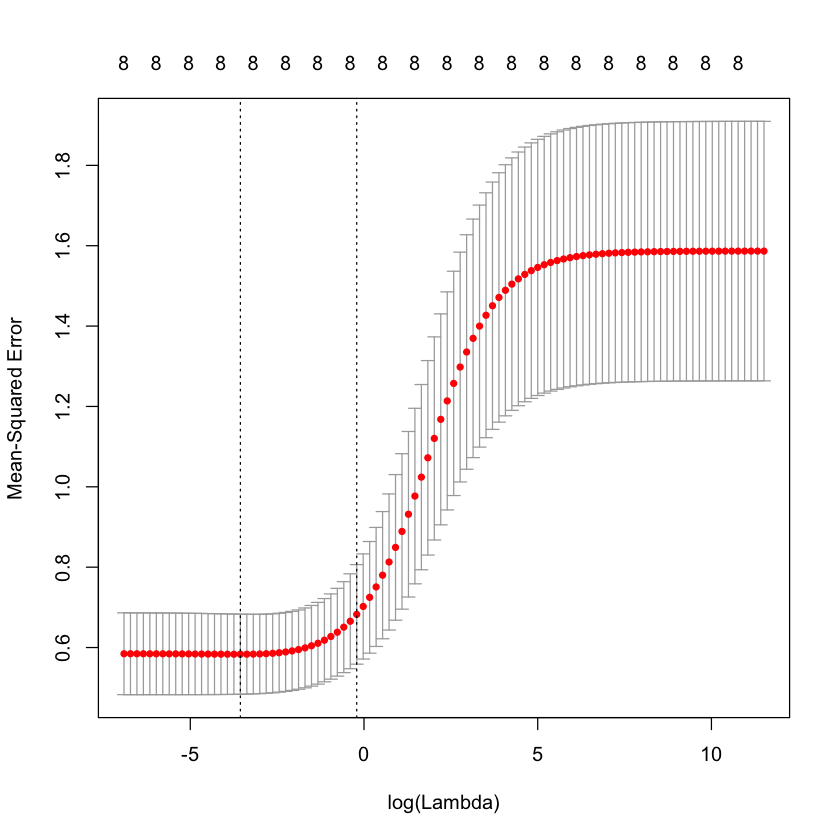

In [8]:
## let's use cross-validation!
#install.packages("glmnet")
library(glmnet)  
# Perform 5-fold cross-validation to select lambda ---------------------------
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
ridge_cv <- cv.glmnet(as.matrix(train[,1:8]), as.vector(train[,9]), alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 5)  #alpha=0 means ridge regression
# Plot cross-validation results
plot(ridge_cv)

In [9]:
# Best cross-validated lambda
lambda_cv <- ridge_cv$lambda.min
lambda_cv
# Fit final model, get its sum of squared residuals, multiple R-squared, and training error
model_cv <- glmnet(as.matrix(train[,1:8]), as.vector(train[,9]), alpha = 0, lambda = lambda_cv, standardize = TRUE)
coef(model_cv)


#since lambda close to 0 should be close to OLS estimates

y_hat_cv <- predict(model_cv, as.matrix(train[,1:8]))
ssr_cv <- t(as.vector(train[,9]) - y_hat_cv) %*% (as.vector(train[,9]) - y_hat_cv)
rsq_ridge_cv <- cor(as.vector(train[,9]), y_hat_cv)^2


mean(ssr_cv)
rsq_ridge_cv

[1] 0.02848036

9 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  0.286020440
lcavol       0.544526485
lweight      0.611123872
age         -0.017505526
lbph         0.142598720
svi          0.716020846
lcp         -0.170845562
gleason     -0.009042973
pgg45        0.008462386

[1] 29.50699

s0
0.6937964


In [10]:
# Get test error
y_hat_cv <- predict(model_cv, newx=as.matrix(test[,1:8]), type="response")
#ssr_cv <- t(as.vector(test[,9]) - y_hat_cv) %*% (as.vector(test[,9]) - y_hat_cv)
rsq_ridge_cv <- cor(as.vector(test[,9]), y_hat_cv)^2

prediction.errors=mean((y_hat_cv-test[,9])^2) #mean squared error
prediction.errors  ## lower than before!
ssr_cv
#rsq_ridge_cv

[1] 0.5083783

,s0
s0,29.50699


### Lasso Regularization: Unlike ridge regression, which penalizes sum of squared coefficients (L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of $\lambda$, many coefficients are exactly 0 under lasso.

![Image of Lasso](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418448/eq11_ij4mms.png)

#### Lasso performs variable selection!  Lasso tends to do well if there are a small number of significant parameters and the others are close to zero 

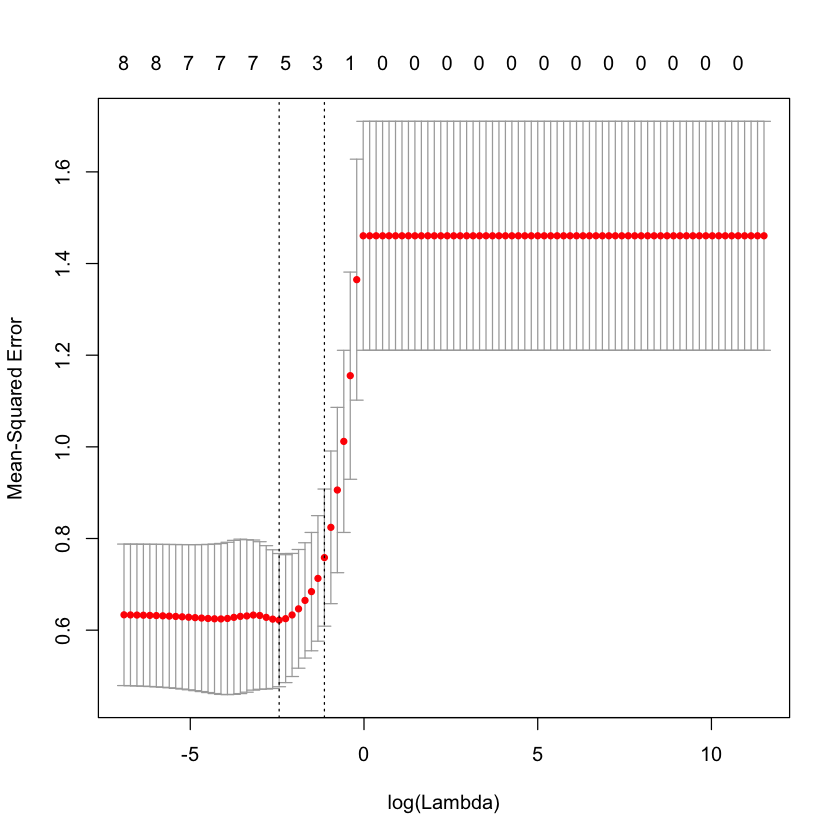

In [11]:
# Perform 5-fold cross-validation to select lambda ---------------------------
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
lasso_cv <- cv.glmnet(as.matrix(train[,1:8]), as.vector(train[,9]), alpha = 1, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 5)  #alpha=0 means ridge regression
# Plot cross-validation results
plot(lasso_cv)

In [12]:
# Best cross-validated lambda
lambda_cv <- lasso_cv$lambda.min
lambda_cv
# Fit final model, get its sum of squared residuals and multiple R-squared
model_cv <- glmnet(as.matrix(train[,1:8]), as.vector(train[,9]), alpha = 1, lambda = lambda_cv, standardize = TRUE)

coef(model_cv)


y_hat_cv <- predict(model_cv, as.matrix(test[,1:8]))
ssr_cv <- t(as.vector(test[,9]) - y_hat_cv) %*% (as.vector(test[,9]) - y_hat_cv)
rsq_lasso_cv <- cor(as.vector(test[,9]), y_hat_cv)^2


prediction.errors=mean((y_hat_cv-test[,9])^2) 
prediction.errors  ## lower than before!
ssr_cv
#rsq_lasso_cv

[1] 0.0869749

9 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) -0.116057423
lcavol       0.463866809
lweight      0.493760425
age          .          
lbph         0.080760924
svi          0.432164344
lcp          .          
gleason      .          
pgg45        0.002518824

[1] 0.4538917

,s0
s0,13.61675


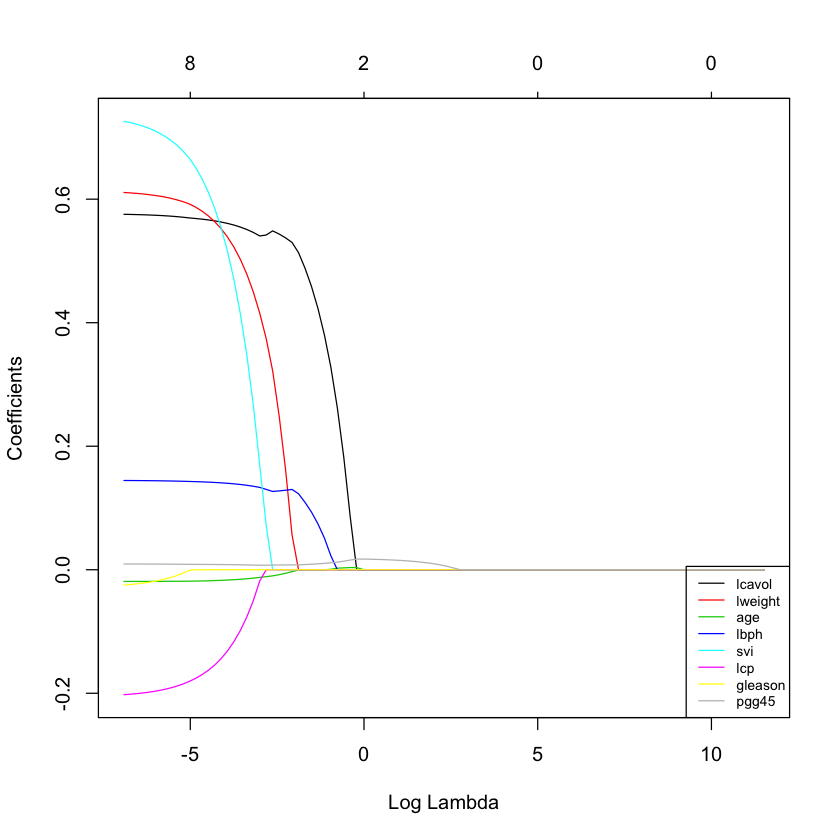

In [13]:
## Let's look at how coefficients shrink
res <- glmnet(as.matrix(train[,1:8]), as.vector(train[,9]), alpha = 1, lambda = lambdas_to_try, standardize = FALSE)
plot(res, xvar = "lambda", col=1:8)
legend("bottomright", lwd = 1, col = 1:8, legend = colnames(as.matrix(train[,1:8])), cex = .7)

### Elastic Net: combine the penalties of ridge regression and lasso. Minimizes:

![Image of elastic](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418448/eq12_vh6ilt.png)

where $\alpha$ is the mixing parameter between lasso and ridge.  We now have two parameters to tune-- $\alpha$ and $\lambda$  

This can be done using R package caret. 

## All of these methods can be used for logistic regression!